In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.agents import AgentExecutor, create_react_agent, tool

from langchain_core.runnables import Runnable
from langchain_core.messages import AIMessage, HumanMessage, AnyMessage

from langgraph.graph import StateGraph, END, START
from langgraph.graph.message import add_messages

from typing import Annotated, Dict, Optional
from typing_extensions import TypedDict
from langgraph.prebuilt import ToolNode, tools_condition

from dotenv import load_dotenv

from RAG import RAG

# 환경변수 로드 및 LLM 정의
load_dotenv()
llm = ChatOpenAI(model="gpt-4-turbo", temperature=0)

# react_agent 정의 
tool = TavilySearchResults(max_results=2)
tools = [tool]
template = """
사용자의 질문에 단계적으로 사고하고 다음 질문에 최선을 다해 답변하세요. 당신은 다음 도구들에 접근할 수 있습니다:
{tools}

다음 형식을 사용하세요:

Question: 답변해야 하는 입력 질문
Thought: 무엇을 할지 항상 생각하세요
Action: 취해야 할 행동, [{tool_names}] 중 하나여야 합니다. 리스트에 있는 도구 중 1개를 택하십시오.
Action Input: 행동에 대한 입력값
Observation: 행동의 결과
... (이 Thought/Action/Action Input/Observation의 과정이 N번 반복될 수 있습니다)
Thought: 이제 최종 답변을 알겠습니다
Final Answer: 원래 입력된 질문에 대한 최종 답변

시작하세요!

Question: {input}
Thought: {agent_scratchpad}"""
prompt = PromptTemplate.from_template(template)
react_agent = create_react_agent(llm, tools=tools, prompt=prompt)


# 📦 LangGraph 상태 정의
class GraphState(TypedDict):
    input: Annotated[list, add_messages]
    health: Optional[str] = None
    menus: Optional[str] = None
    web: Optional[str] = None
    reply: Optional[str] = None


# 🔧 ReAct Agent Node
def agent_node(state: GraphState) -> Dict:
    return {
        "health": "health",
        "menus": "menus",
        "web": "web",
        "reply": "reply",
    }

def prompt_node(state: GraphState) -> Dict:
    return {
        "health": "health",
        "menus": "menus",
        "web": "web",
        "reply": "reply",
    }

# 💬 LLM Chat Node (결과를 재정리하거나 요약 가능)
def chat_node(state: GraphState) -> Dict:
    return {
        "health": "health",
        "menus": "menus",
        "web": "web",
        "reply": "reply",
    }

def verificaion_node(state: GraphState) -> Dict:
    return {
        "health": "health",
        "menus": "menus",
        "web": "web",
        "reply": "reply",
    }

def visualization_node(state: GraphState) -> Dict:
    return {
        "health": "health",
        "menus": "menus",
        "web": "web",
        "reply": "reply",
    }



# 🌐 LangGraph 구성
graph_builder = StateGraph(GraphState)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)
graph_builder.add_node("agent_node", agent_node)
graph_builder.add_node("prompt_node", chat_node)
graph_builder.add_node("chat_node", chat_node)
graph_builder.add_node("verificaion_node", chat_node)
graph_builder.add_node("visualization_node", chat_node)

# 엣지 정의
graph_builder.set_entry_point("agent_node")

def condition1():
    return "agent_node"
    
graph_builder.add_conditional_edges(
    "agent_node",
    condition1,
    {"tools": "tools", "prompt_node": "prompt_node"},
)
graph_builder.add_edge("tools", "agent_node")

graph_builder.add_edge("prompt_node", "chat_node")
graph_builder.add_edge("chat_node", "verificaion_node")

def condition2():
    return str(True)

graph_builder.add_conditional_edges(
    "verificaion_node",
    condition2,
    {
        "visualization_node": "visualization_node",
        "agent_node": "agent_node",
    }
)
graph_builder.add_edge("visualization_node", END)



# Graph 완성
graph = graph_builder.compile()

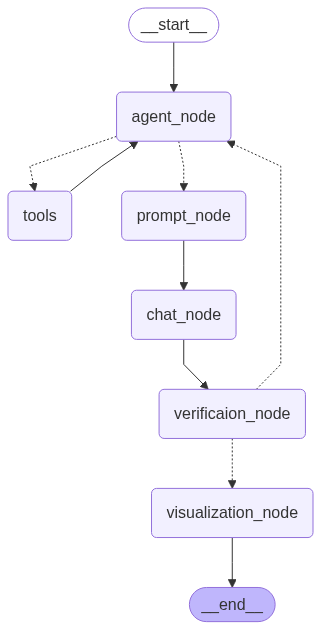

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from IPython.display import Image, display
# display(Image(graph.get_graph().draw_mermaid_png()))

graph_code = graph.get_graph().draw_mermaid()  # Mermaid 문자열을 얻는 메서드가 있다면
graph_code = '%%{ init : { "flowchart": { "curve": "basis" } } }%%\n' + graph_code

Image(graph.draw_mermaid_png(graph_code))  # draw_mermaid_png에 문자열을 넘기는 구조라면

# Mermaid 이미지 생성
image = graph_builder.get_graph().draw_mermaid_png(mermaid_code)

# 표시
display(Image(image))

AttributeError: 'CompiledStateGraph' object has no attribute 'draw_mermaid_png'

In [31]:
from IPython.display import Image, display

# Mermaid 코드 추출은 graph_builder.get_graph() 에서!
mermaid_code = graph_builder.get_graph().draw_mermaid()

# 곡선형 스타일 적용
mermaid_code = '%%{ init : { "flowchart": { "curve": "basis" } } }%%\n' + mermaid_code

# Mermaid 이미지 생성
image = graph_builder.get_graph().draw_mermaid_png(mermaid_code)

# 표시
display(Image(image))


AttributeError: 'StateGraph' object has no attribute 'get_graph'